In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
#Reading in the data

xls = pd.ExcelFile("ml_data_final.xlsx")

df_train = pd.read_excel(xls, "Sheet1")
df_train_og = pd.read_excel(xls, "Sheet1")

In [47]:
for i in range(df_train.shape[0]):
    df_train['Category'][i] = df_train['Category'][i].lower()
    df_train['Brand'][i] = df_train['Brand'][i].lower()

<ipython-input-47-639555bb9e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Category'][i] = df_train['Category'][i].lower()
<ipython-input-47-639555bb9e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Brand'][i] = df_train['Brand'][i].lower()


In [48]:
df_train.head()

,Product_name,Product_url,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,Lymio Women's Regular Top,https://www.amazon.in/Lymio-Womens-Regular-Top...,clothing and accessories,4.4,197.0,379.0,lymio,500
1,Lymio Women's Regular Color Chocker Neck Half ...,https://www.amazon.in/Lymio-Womens-Regular-Top...,clothing and accessories,4.1,482.0,369.0,lymio,436
2,Women Printed Slub Rayon Top with Half Sleeves,https://www.amazon.in/DHRUVI-TRENDZ-Printed-Sl...,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,Butterfly Tops for Women Stylish,https://www.amazon.in/Bhumi-fashion-Butterfly-...,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,Women's Diva Slub Regular Fit Dyed Top,https://www.amazon.in/SIRIL-WomenS-Rayon-117TK...,clothing and accessories,3.8,367.0,359.0,siril,251


In [49]:
df_train.drop(['Product_name','Product_url'],axis=1,inplace=True)
#Taking of the columns which are of no use

In [50]:
import klib

In [51]:
df_train = klib.data_cleaning(df_train)

Shape of cleaned data: (1405, 6)Remaining NAs: 0

Changes:
Dropped rows: 96
     of which 96 duplicates. (Rows: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 194, 195, 199, 255, 478, 502, 504, 505, 506, 1164, 1360, 1372, 1399, 1428, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-57.14%)



In [52]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called 

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


In [53]:
df_train = klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   Float32 
 2   no_of_reviews        1405 non-null   Float32 
 3   price                1405 non-null   Float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: Float32(3), category(1), int16(1), string(1)
memory usage: 35.9 KB


In [54]:
klib.mv_col_handling(df_train)

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
df_train['category_le']= le.fit_transform(df_train['category'])
df_train['brand_le']= le.fit_transform(df_train['brand'])

In [57]:
df_train

,category,avg_review,no_of_reviews,price,brand,average_sales_month,category_le,brand_le
0,clothing and accessories,4.4,197.0,379.0,lymio,500,0,221
1,clothing and accessories,4.1,482.0,369.0,lymio,436,0,221
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321,0,93
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284,0,47
4,clothing and accessories,3.8,367.0,359.0,siril,251,0,343
...,...,...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951,1,315
1401,electronics,4.6,6532.0,1495.0,logitech,449,1,218
1402,electronics,4.6,4123.0,1482.0,logitech,411,1,218
1403,electronics,4.2,28964.0,229.0,redmi,1296,1,316


In [58]:
X=df_train.drop('average_sales_month',axis=1)

In [59]:
X = X.drop('category', axis = 1)


In [60]:
X = X.drop('brand', axis = 1)

In [61]:
X

,avg_review,no_of_reviews,price,category_le,brand_le
0,4.4,197.0,379.0,0,221
1,4.1,482.0,369.0,0,221
2,3.6,648.0,349.0,0,93
3,2.0,3.0,459.0,0,47
4,3.8,367.0,359.0,0,343
...,...,...,...,...,...
1400,4.3,6510.0,549.0,1,315
1401,4.6,6532.0,1495.0,1,218
1402,4.6,4123.0,1482.0,1,218
1403,4.2,28964.0,229.0,1,316


In [62]:
Y = df_train['average_sales_month']

In [63]:
X_arr = X.to_numpy()
X_arr

array([[4.400000095367432, 197.0, 379.0, 0, 221],
       [4.099999904632568, 482.0, 369.0, 0, 221],
       [3.5999999046325684, 648.0, 349.0, 0, 93],
       ...,
       [4.599999904632568, 4123.0, 1482.0, 1, 218],
       [4.199999809265137, 28964.0, 229.0, 1, 316],
       [4.400000095367432, 18407.0, 649.0, 1, 88]], dtype=object)

In [64]:
## Splitting data into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [66]:
X_train_std = sc.fit_transform(X_train)

In [67]:
X_test_std= sc.transform(X_test)

In [68]:
Y_train_arr = Y_train.to_numpy(dtype = np.float32)
Y_test_arr = Y_test.to_numpy(dtype = np.float32)

In [69]:
Y_train_2d = np.reshape(Y_train_arr, (Y_train_arr.shape[0], 1) )
Y_test_2d = np.reshape(Y_test_arr, (Y_test_arr.shape[0], 1))

In [70]:
#Normalizing the output
Y_train_std = sc.fit_transform(Y_train_2d)
Y_test_std = sc.fit_transform(Y_test_2d)

In [71]:
#To reshape
X_train_std

array([[ 0.5072032 ,  3.0251873 , -0.18393741, -0.02155924,  0.29439359],
       [ 0.5072032 , -0.30707258, -0.26141909, -1.23318829,  1.37710115],
       [-6.50740053, -0.30746601, -0.30029008,  1.19006981, -0.10752058],
       ...,
       [ 0.93233027,  0.07113154, -0.32961686,  1.19006981, -0.1403299 ],
       [-0.76817952, -0.04746122, -0.24389244, -0.02155924, -1.39528638],
       [ 0.5072032 , -0.28371936, -0.315127  ,  1.19006981, -0.3863998 ]])

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components = 1)

In [83]:
A = pca.fit(X_train_std)
A

PCA(n_components=1)

In [84]:
print(pca.singular_values_)

[38.58578183]


In [85]:
print(len(pca.explained_variance_ratio_))

1


In [86]:
X_pca = pca.transform(X_train_std)

In [87]:
X_pca

array([[-0.94814736],
       [ 1.14488447],
       [ 3.13690163],
       ...,
       [-1.36927962],
       [-0.05226175],
       [-1.123498  ]])

In [88]:
X_train_std.shape

(1124, 5)

In [89]:
X_pca.shape

(1124, 1)

In [90]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [91]:
lr.fit(X_pca, Y_train)

LinearRegression()

In [93]:
X_test_pca = pca.transform(X_test_std)

In [95]:
Y_pred_lr=lr.predict(X_test_pca)

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [97]:
print('R2 score : ', r2_score(Y_test,Y_pred_lr))
print('mean absolute error : ',mean_absolute_error(Y_test,Y_pred_lr))
print('Mean squared error : ',np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

R2 score :  0.09766416761380692
mean absolute error :  737.4987399072083
Mean squared error :  1141.2748790102555


Text(0, 0.5, 'Number of sales')

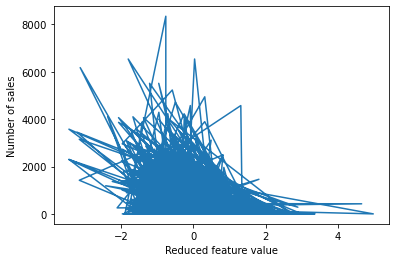

In [100]:
Y_pred_train = lr.predict(X_pca)

In [102]:
Y_pred_train.shape

(1124,)

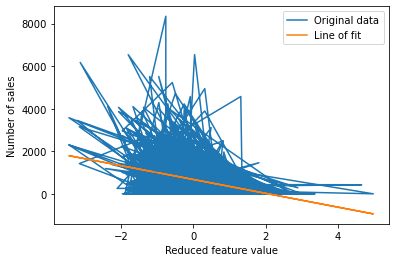

In [105]:
#Plotting original data set
plt.plot(X_pca, Y_train_arr, label = "Original data")
plt.plot(X_pca, Y_pred_train, label = "Line of fit")
plt.xlabel("Reduced feature value")
plt.ylabel("Number of sales")
plt.legend()

In [106]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print('R2 score : ', r2_score(Y_test,Y_pred_lr))
print('mean absolute error : ',mean_absolute_error(Y_test,Y_pred_lr))
print('Mean squared error : ',np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))